In [13]:
import pandas as pd
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [14]:
df_rm_yields = pd.read_csv(r'C:\Users\Administrator\Desktop\jupytar\rm yeild\rm-yields-data (1).csv')
gdf_rm = gpd.read_file(r'C:\Users\Administrator\Desktop\jupytar\final project\RM_shapefile\RuralMunicipality.shp')
gdf_rm['RMNO'] = gdf_rm['RMNO'].astype(int)
gdf_rm_clean = gdf_rm[['RMNO', 'geometry']].rename(columns={'RMNO': 'RM'})


In [15]:
df_major_crops = df_rm_yields[['Year', 'RM', 'Canola', 'Spring Wheat']]
df_00_23 = df_major_crops[(df_major_crops['Year'] >= 2000)].dropna()
merged_df = pd.merge(gdf_rm_clean, df_00_23.groupby('RM').mean(), on='RM').dropna()



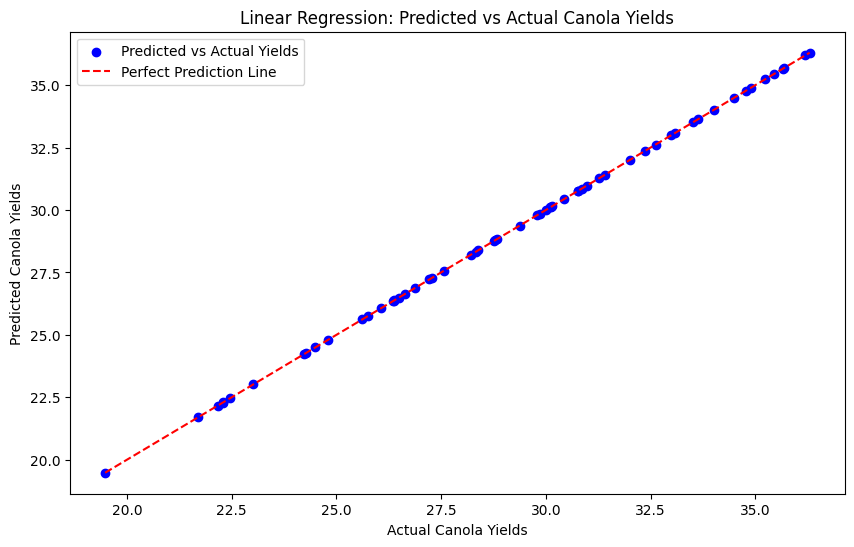

In [26]:
# Load dataset
df_rm_yields = pd.read_csv(r'C:\Users\Administrator\Desktop\jupytar\rm yeild\rm-yields-data (1).csv')

# Filter and prepare the main dataset
df_major_crops = df_rm_yields[['Year', 'RM', 'Canola', 'Spring Wheat']]
df_00_23 = df_major_crops[(df_major_crops['Year'] >= 2000)].dropna()

# For simplicity, let's just focus on the Canola crop in this example
df_canola = df_00_23[['Year', 'RM', 'Canola']]
df_canola_grouped = df_canola.groupby('RM').mean().reset_index()
# Define features and target variable
X = df_canola_grouped[['Canola']]
y = df_canola_grouped['Canola']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict crop yields
predicted_yields = model.predict(X_test)
# Plot regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_yields, color='blue', label='Predicted vs Actual Yields')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Canola Yields')
plt.ylabel('Predicted Canola Yields')
plt.title('Linear Regression: Predicted vs Actual Canola Yields')
plt.legend()
plt.show()
